In [574]:
import pandas as pd

In [575]:
wine = pd.read_csv('winequalityN.csv')

In [576]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [577]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [578]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [579]:
## Vamos a verificar si vale la pena estratificar por type

In [580]:
cols = ['type']

In [581]:
cols

['type']

In [582]:
cols_validas = []
cols_many_levels = []
cols_one_level = []

size_df = wine.shape[0]
umbral = .95

for c_ in cols:
    
    niveles = wine.loc[ : , [c_] ].drop_duplicates().shape[0]
    
    if ( niveles / size_df ) >= umbral:
        cols_many_levels.append(c_)
    elif niveles == 1:
        cols_one_level.append(c_)
    else:
        cols_validas.append(c_)

In [583]:
cols_many_levels

[]

In [584]:
cols_validas

['type']

In [585]:
cols_one_level

[]

In [586]:
levels2 = wine.groupby(["type"], as_index = False ).agg({"type":{"count"}})
levels2.columns = levels2.columns.droplevel(1)
levels2

,type
0,1599
1,4898


In [587]:
## Como podemos ver, al momento de hacer el conteo en nuestro DataFrame no contamos con ninguna columna que tenga valores
## únicos, por lo tanto yo pienso que no vale la pena estratificar por la variable type, ya que no contamos con una variable
## que nos sirva para saber cuantos elementos de cada type tenemos.

In [588]:
##############################################################################################################################

In [589]:
## Limpieza de valores nulos en las columnas.

In [590]:
## Voy a ver cuales son las columnas que tienen valores nulos y esos valores nulos los voy a sustituir por la media.

In [591]:
nulldf = pd.DataFrame()
for col_ in wine.columns:
    r_  = pd.DataFrame({
        'col' : [col_]
        , 'count_nulls' : [sum(pd.isnull(wine[col_]))]
    })
    nulldf = pd.concat([nulldf, r_])

In [592]:
nulldf

,col,count_nulls
0,type,0
0,fixed acidity,10
0,volatile acidity,8
0,citric acid,3
0,residual sugar,2
0,chlorides,2
0,free sulfur dioxide,0
0,total sulfur dioxide,0
0,density,0
0,pH,9


In [593]:
## Las columnas con valores nulos son: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH y sulphates
## Los valores nulos que tienen los voy a sustituir por la media.

In [594]:
## Para la columna fixed acidity

In [595]:
wine['fixed acidity'].median()

7.0

In [596]:
wine['fixed acidity'].fillna(7,inplace=True)

In [597]:
## Para la columna volatile acidity

In [598]:
wine['volatile acidity'].median()

0.29

In [599]:
wine['volatile acidity'].fillna(0.29,inplace=True)

In [600]:
## Para la columna citric acid

In [601]:
wine['citric acid'].median()

0.31

In [602]:
wine['citric acid'].fillna(0.31,inplace=True)

In [603]:
## Para la columna residual sugar

In [604]:
wine['residual sugar'].median()

3.0

In [605]:
wine['residual sugar'].fillna(3,inplace=True)

In [606]:
## Para la columna chlorides

In [607]:
wine['chlorides'].median()

0.047

In [608]:
wine['chlorides'].fillna(0.047,inplace=True)

In [609]:
## Para la columna pH

In [610]:
wine['pH'].median()

3.21

In [611]:
wine['pH'].fillna(3.21,inplace=True)

In [612]:
## Para la columna sulphates

In [613]:
wine['sulphates'].median()

0.51

In [614]:
wine['sulphates'].fillna(0.51,inplace=True)

In [615]:
## Ahora vamos a verificar que no tengamos ninguna columna con valores nulos

In [616]:
nulldf = pd.DataFrame()
for col_ in wine.columns:
    r_  = pd.DataFrame({
        'col' : [col_]
        , 'count_nulls' : [sum(pd.isnull(wine[col_]))]
    })
    nulldf = pd.concat([nulldf, r_])

In [617]:
nulldf

,col,count_nulls
0,type,0
0,fixed acidity,0
0,volatile acidity,0
0,citric acid,0
0,residual sugar,0
0,chlorides,0
0,free sulfur dioxide,0
0,total sulfur dioxide,0
0,density,0
0,pH,0


In [618]:
##############################################################################################################################

In [619]:
## PCA

In [620]:
## Pienso que no es necesario hacer una separación por white o red, ya que no tenemos una variable que tenga valores únicos
## para cada uno de los registros, o sea que no sabemos cuantos registros pertenecen a white, o cuantos pertenecen a red.

In [621]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [622]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

In [623]:
## Las cinco columnas que vamos a utilizar son: fixed acidity, volatile acidity, citric acid, residual sugar y chlorides

In [624]:
wine_n =  wine.loc[ : , ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'] ].copy()

In [625]:
x = wine_n["fixed acidity"] 
y = wine_n["chlorides"]

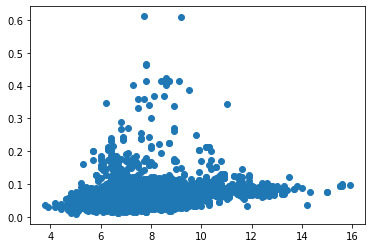

In [626]:
## Visualmente no puedo decir que tipo de correlación tienen estas dos variables. Parecia que fuera neutral.

plt.scatter( x , y )

In [627]:
w = wine_n.corr()
w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
fixed acidity,1.000000,0.219872,0.323498,-0.112194,0.298249
volatile acidity,0.219872,1.000000,-0.377827,-0.196275,0.377141
citric acid,0.323498,-0.377827,1.000000,0.142411,0.039247
residual sugar,-0.112194,-0.196275,0.142411,1.000000,-0.128891
chlorides,0.298249,0.377141,0.039247,-0.128891,1.000000


In [628]:
## Implementación de PCA

In [629]:
## Estas son las columnas que voy a utilizar para hacer mi reducción de dimensiones

cols_to_use = [ "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides"]

In [630]:
x = wine.loc[ : , cols_to_use ].values
x

array([[ 7.   ,  0.27 ,  0.36 , 20.7  ,  0.045],
       [ 6.3  ,  0.3  ,  0.34 ,  1.6  ,  0.049],
       [ 8.1  ,  0.28 ,  0.4  ,  6.9  ,  0.05 ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 ,  2.3  ,  0.076],
       [ 5.9  ,  0.645,  0.12 ,  2.   ,  0.075],
       [ 6.   ,  0.31 ,  0.47 ,  3.6  ,  0.067]])

In [631]:
## Estandarización

In [632]:
x = np.around( x , 2 )
x

array([[ 7.  ,  0.27,  0.36, 20.7 ,  0.04],
       [ 6.3 ,  0.3 ,  0.34,  1.6 ,  0.05],
       [ 8.1 ,  0.28,  0.4 ,  6.9 ,  0.05],
       ...,
       [ 6.3 ,  0.51,  0.13,  2.3 ,  0.08],
       [ 5.9 ,  0.64,  0.12,  2.  ,  0.08],
       [ 6.  ,  0.31,  0.47,  3.6 ,  0.07]])

In [633]:
np.nan_to_num(x)

array([[ 7.  ,  0.27,  0.36, 20.7 ,  0.04],
       [ 6.3 ,  0.3 ,  0.34,  1.6 ,  0.05],
       [ 8.1 ,  0.28,  0.4 ,  6.9 ,  0.05],
       ...,
       [ 6.3 ,  0.51,  0.13,  2.3 ,  0.08],
       [ 5.9 ,  0.64,  0.12,  2.  ,  0.08],
       [ 6.  ,  0.31,  0.47,  3.6 ,  0.07]])

In [634]:
## Aqui yo estoy preparando el modelo, que en este caso se va a llamar pca

pca = PCA( n_components=2 )

In [635]:
## Una vez que yo tengo lo de arriba, voy a iniciar el entrenamiento
principalComponents = pca.fit_transform(x)

In [636]:
## Ahora con PCA, la representatividad que yo tenia en cinco variables, van a quedar representadas por dos columnas

pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

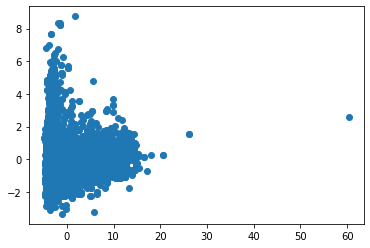

In [637]:
## Represento los dos vectores con un scatter plot.
## Aqui yo estoy generando mi primer sistema de recomendación, utilizando la información de todas las variables.

plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [638]:
###############################################################################################################################

In [639]:
## KMeans

In [640]:
## Voy a generar tres clusters, para los tres perfiles del vino, y voy a mandar lo que nosotros obtuvimos como resultado en
## el PCA.

km = KMeans( n_clusters=3  ).fit(pcadf)

In [641]:
## Con estos tres puntos tengo las coordenadas de los tres centroides.

km.cluster_centers_

array([[ 8.89758024,  0.08754655],
       [-3.29537417,  0.08685498],
       [ 2.11663121, -0.25766194]])

In [645]:
## Acá como yo entrene con tres clusters, me salieron tres categorias: 0, 1 y 2"

km.labels_

array([0, 1, 2, ..., 1, 1, 1])

In [646]:
## La tabla de abajo son las coordenadas de cada uno de los 6497 vinos.

pcadf

,c1,c2
0,15.255431,0.286260
1,-3.810798,-1.041533
2,1.427227,0.931863
3,3.055954,0.081738
4,3.055954,0.081738
...,...,...
6492,-3.410940,-1.130404
6493,-3.200711,-1.424042
6494,-3.113567,-1.021102
6495,-3.401148,-1.427415


In [647]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


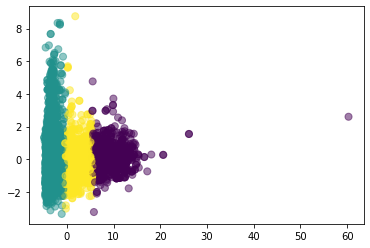

In [648]:
## Aqui se ha pintado los puntos que pertenecen a cada uno de los tres diferentes perfiles de vinos con un color diferente.

## Cada punto que se encuentra en este scatter plot representa a un vino del DataSet, por lo que cada vino del DataSet se
## ha perfilado o categorizado de acuerdo a un grupo en específico, esto es asi porque comparten casi todas las
## caracteristicas entre sí, o sea que casi todos los valores de los vinos que pertenecen a un perfil en particular
## tienen valores de sus columnas casi iguales. 

plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [649]:
wine_n['perfil'] = km.labels_

In [650]:
## Aqui vemos el registro de cada vino, y el correspondiente perfil al cual pertenecen.
wine_n

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,perfil
0,7.0,0.270,0.36,20.7,0.045,0
1,6.3,0.300,0.34,1.6,0.049,1
2,8.1,0.280,0.40,6.9,0.050,2
3,7.2,0.230,0.32,8.5,0.058,2
4,7.2,0.230,0.32,8.5,0.058,2
...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,1
6493,5.9,0.550,0.10,2.2,0.062,1
6494,6.3,0.510,0.13,2.3,0.076,1
6495,5.9,0.645,0.12,2.0,0.075,1


In [651]:
## "El promedio de fixed acidity en el cluster 0 y en el cluster 1 es casi igual. Por eso el cluster morado, y el cluster"
## "amarrillo estan pegados, porque comparten la caracteristica de fixed acidity."

wine_n.loc[ wine_n['perfil'] == 0 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,perfil
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0
mean,7.010506,0.279742,0.359066,14.338911,0.049819,0.0
std,0.760263,0.096143,0.135600,2.963905,0.020383,0.0
min,3.800000,0.105000,0.000000,11.000000,0.024000,0.0
25%,6.500000,0.220000,0.270000,12.400000,0.042000,0.0
50%,7.000000,0.260000,0.320000,13.900000,0.048000,0.0
75%,7.400000,0.320000,0.420000,15.600000,0.054000,0.0
max,11.800000,0.965000,1.000000,65.800000,0.301000,0.0


In [652]:
## "El promedio de fixed acidity en el cluster 1 y en el cluster 2 es casi igual. Por eso el cluster amarillo, y el cluster"
## "verde estan pegados, porque comparten la caracteristica de fixed acidity."

wine_n.loc[ wine_n['perfil'] == 1 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,perfil
count,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.0
mean,7.411031,0.372114,0.303828,2.153695,0.061186,1.0
std,1.502705,0.187201,0.155194,0.921437,0.040764,0.0
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.0
25%,6.400000,0.230000,0.230000,1.500000,0.037000,1.0
50%,7.100000,0.320000,0.300000,2.000000,0.050000,1.0
75%,8.000000,0.490000,0.390000,2.500000,0.077000,1.0
max,15.600000,1.580000,1.660000,5.200000,0.611000,1.0


In [653]:
wine_n.loc[ wine_n['perfil'] == 2 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,perfil
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,6.890116,0.301284,0.328206,7.552074,0.047911,2.0
std,0.892225,0.116126,0.119110,1.690148,0.023864,0.0
min,4.200000,0.090000,0.000000,4.750000,0.014000,2.0
25%,6.400000,0.230000,0.260000,6.200000,0.036000,2.0
50%,6.800000,0.280000,0.310000,7.500000,0.044000,2.0
75%,7.300000,0.340000,0.380000,8.800000,0.052000,2.0
max,15.900000,1.035000,0.910000,10.900000,0.346000,2.0


In [654]:
############################################################################################################################

In [655]:
## Voy a agregar la columna perfil al DataSet original, y voy a eliminar las columnas que hayan formado parte del análisis PCA

In [657]:
wine['perfil'] = km.labels_

wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,perfil
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [658]:
wine_n.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'],axis = 'columns', inplace=True)
wine_n

,perfil
0,0
1,1
2,2
3,2
4,2
...,...
6492,1
6493,1
6494,1
6495,1


In [659]:
############################################################################################################################

In [660]:
## Voy a eliminar la variable quality del DataSet

In [661]:
wine.drop(['quality'],axis = 'columns', inplace=True)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,perfil
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [662]:
############################################################################################################################

In [663]:
## Al momento de hacer el conteo en nuestro DataFrame no contamos con ninguna columna que tenga valores únicos, por lo tanto yo
## pienso que no vale la pena estratificar por la variable type, ya que no contamos con una variable que nos sirva para saber
## cuantos elementos de cada type tenemos.

In [664]:
############################################################################################################################

In [665]:
## Regresión lineal

In [666]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [667]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,perfil
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [669]:
## Lo que voy a hacer es calcular dos vectores. Nuestro vector x es free sulfur dioxide, y nuestro vector y es el pH."

y = wine.loc[ : , "free sulfur dioxide" ].values
x = wine.loc[ : , ["pH"] ].values

In [670]:
## Vamos a crear ahora cuatro variables. Lo que voy a utilizar de la variable x para poder entrenar (X_Train), lo que voy a
## utilizar de x para poder testear (X_Test), lo que voy a utilizar de la variable y para poder entrenar (Y_Train), y lo que
## voy a utilizar de y para poder testear (Y_Test)

X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=.35, random_state=0 )

In [671]:
np.mean(y)

30.525319378174544

In [672]:
np.mean(Y_Train)

30.284513379114372

In [673]:
np.mean(Y_Test)

30.972515391380828

In [674]:
##########################################         Entrenamiento           ####################################################

In [675]:
## Con regressión voy a crear el objeto del modelo estadístico que voy a querer entrenar. En este caso es una LinearRegression.
regression = LinearRegression()

## Voy a pasar como parámetros nuestro x de entrenamiento (X_Train), y nuestro y de entrenamiento (Y_Train)
regression.fit( X_Train , Y_Train )

LinearRegression()

In [676]:
## Estos son nuestros valores de testeo
Y_Test

array([ 7., 19., 26., ..., 24., 42., 27.])

In [677]:
## Aquí tengo los x con los que yo quiero testear.

X_Test

array([[3.24],
       [3.32],
       [3.19],
       ...,
       [3.4 ],
       [3.25],
       [3.05]])

In [678]:
## Aqui vamos a predecir en función de un modelo ya entrenado.
regression.predict( X_Test )

array([29.97238947, 28.74238896, 30.74113978, ..., 27.51238846,
       29.8186394 , 32.89364066])

In [679]:
X_Test

array([[3.24],
       [3.32],
       [3.19],
       ...,
       [3.4 ],
       [3.25],
       [3.05]])

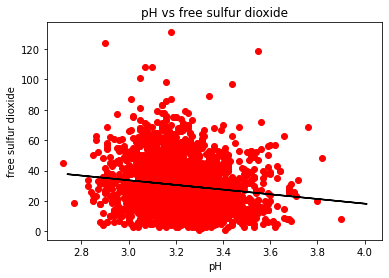

In [680]:
## Aqui vamos a graficar nuestro X_Test, y nuestro Y_Test. Los puntos rojos es lo que anda testeando.

## La línea recta es la línea que nosotros estamos prediciendo. Para la línea recta, el eje x es nuestro X_Train, y el eje y"
## es nuestra predicción de x, o sea predict(X_Train)

viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = 'red')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title("pH vs free sulfur dioxide")
viz_train.xlabel("pH")
viz_train.ylabel("free sulfur dioxide")
viz_train.show()

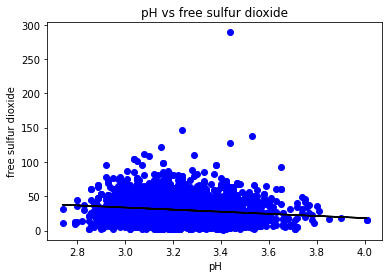

In [681]:
## Si vemos las gráficas de entrenamiento y testeo, vemos que ambas son parecidas.

viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title("pH vs free sulfur dioxide")
viz_train.xlabel("pH")
viz_train.ylabel("free sulfur dioxide")
viz_train.show()

In [682]:
## Con regression.coef_ nos va a devolver un arreglo de todos los coeficientes que encontro, en función de todas las variables
regression.coef_

array([-15.37500628])